# Binary classification with neural networks

Neural networks are adept at fitting non-linear datasets. To demonstrate, we'll fit a binary classifier to a two-class dataset generated with Scikit's [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) function. Start by creating the dataset and plotting it. In the plot, purple corresponds to class 0 (the negative class) and red corresponds to class 1 (the positive class).

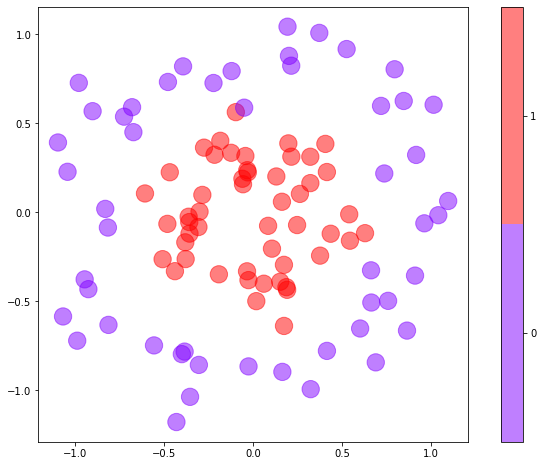

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

x, y = make_circles(100, factor=0.4, noise=0.15, random_state=1)
plt.figure(figsize=(12, 8))
plt.axes().set_aspect('equal')
plt.scatter(x[:, 0], x[:, 1], c=y, s=300, cmap=plt.cm.get_cmap('rainbow', 2), alpha=0.5)
plt.colorbar(ticks=range(2))
plt.clim(-0.5, 1.5)

Define a simple neural network (a multilayer perceptron) with a single hidden layer. Since this network is intended to perform binary classification, include an output layer that contains one neuron and uses the [sigmoid](https://keras.io/api/layers/activations/#sigmoid-function) activation function, and specify [binary_crossentropy](https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function) as the loss function.

In [2]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


Train the network. Use a small batch size since there are only 100 samples in the dataset.

In [3]:
hist = model.fit(x, y, validation_split=0.2, epochs=40, batch_size=10)

Epoch 1/40
8/8 [==============================] - 7s 39ms/step - loss: 0.6836 - accuracy: 0.5172 - val_loss: 0.6617 - val_accuracy: 0.6500
Epoch 2/40
8/8 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.4408 - val_loss: 0.6558 - val_accuracy: 0.6500
Epoch 3/40
8/8 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5378 - val_loss: 0.6481 - val_accuracy: 0.7000
Epoch 4/40
8/8 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5166 - val_loss: 0.6420 - val_accuracy: 0.7000
Epoch 5/40
8/8 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5281 - val_loss: 0.6368 - val_accuracy: 0.7000
Epoch 6/40
8/8 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5892 - val_loss: 0.6293 - val_accuracy: 0.7000
Epoch 7/40
8/8 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.5648 - val_loss: 0.6249 - val_accuracy: 0.7000
Epoch 8/40
8/8 [=================

Plot the training and validation accuracy.

[]

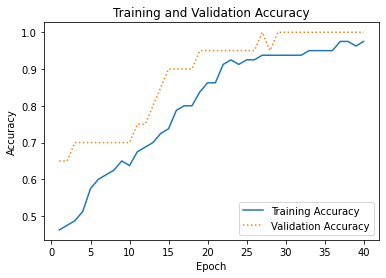

In [4]:
err = hist.history['accuracy']
val_err = hist.history['val_accuracy']
epochs = range(1, len(err) + 1)
 
plt.plot(epochs, err, '-', label='Training Accuracy')
plt.plot(epochs, val_err, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Predict the probability that a point that lies at (-0.5, 0.0) belongs to the positive class (red).

In [5]:
model.predict(np.array([[-0.5, 0.0]]))[0][0]

0.5906321

Predict which class a point that lies at (-0.5, 0.0) belongs to.

In [6]:
(model.predict(np.array([[-0.5, 0.0]])) > 0.5).astype('int32')[0][0]

1

Predict the probability that a point that lies at (0.6, 0.6) belongs to the positive class (red).

In [7]:
model.predict(np.array([[0.6, 0.6]]))[0][0]

0.4519902

Predict which class a point that lies at (0.6, 0.6) belongs to.

In [8]:
(model.predict(np.array([[0.6, 0.6]])) > 0.5).astype('int32')[0][0]

0